In [ ]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219254 sha256=8c21ed7a41eea26933afc982feb496f44fb8ef9c9ff272afb116c5718b513574
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(4)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKDK, KDKQ, DKQK, KQKK, QKKK, KKKK, KKKE, KKE..."
1,"[MSWS, SWSG, WSGL, SGLL, GLLH, LLHG, LHGL, HGL..."
2,"[MSLF, SLFD, LFDL, FDLF, DLFR, LFRG, FRGF, RGF..."
3,"[MAVA, AVAP, VAPR, APRL, PRLF, RLFG, LFGG, FGG..."
4,"[MSTI, STIQ, TIQS, IQSE, QSET, SETD, ETDC, TDC..."
...,...
6265,"[MSYF, SYFG, YFGE, FGEH, GEHF, EHFW, HFWG, FWG..."
6266,"[MTVG, TVGK, VGKS, GKSS, KSSK, SSKM, SKML, KML..."
6267,"[MNNL, NNLS, NLSF, LSFS, SFSE, FSEL, SELC, ELC..."
6268,"[MAPE, APEI, PEIN, EINL, INLP, NLPG, LPGP, PGP..."


Median length of Joined sequence is 875


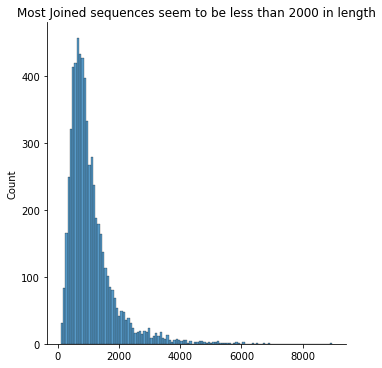

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 100000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8192
min sequence_data length: 89
median sequence_data length: 805


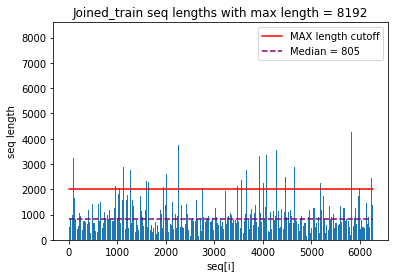

max word index: 99999
Found 157062 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 5586
min sequences_test length: 115
median sequences_test length: 825


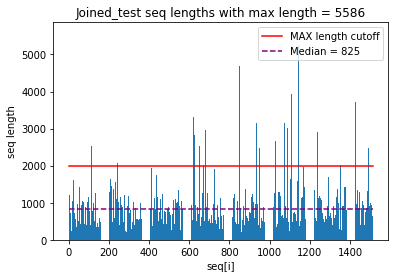

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 100000


In [ ]:
data_4D_join,data_test_4D_join,num_words_4D_join,MAX_SEQUENCE_LENGTH_,MAX_VOCAB_SIZE_ = f.get_seq_data_join(100000,2000,df_train,df_test,pad='pre',show=True)

In [ ]:
EMBEDDING_DIM_ = 10
BATCH_SIZE = 128
EPOCHS = 20
FILTERS_=128
KERNEL_ =32
DROPOUT = 0.7


x = f.conv_model(MAX_SEQUENCE_LENGTH_,EMBEDDING_DIM_,num_words_4D_join)
output = Dense(1, activation='sigmoid')(x.output)
model_CNN_join = Model(x.input, output)
model_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

model_CNN_join.fit(data_4D_join, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE)
print(roc_auc_score(df_test['label'].values, model_CNN_join.predict(data_test_4D_join)))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6497 - accuracy: 0.6180
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4737 - accuracy: 0.7842
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1694 - accuracy: 0.9463
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0691 - accuracy: 0.9827
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0440 - accuracy: 0.9895
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0228 - accuracy: 0.9970
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0144 - accuracy: 0.9972
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0099 - accuracy: 0.9983
Epoch 9/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 10/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 11/